In [37]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
# import xlrd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv("Shortage data/shortage_final.csv")

# converting headers in lowercase
df.columns = df.columns.str.lower()

# replacing spaces for "_" in headers
df.columns = df.columns.str.replace(' ', '_')

# Removing NaN actual_start_date and actual_end_date, considering as an incomplete record
df=df.dropna(subset=['actual_start_date','actual_end_date'] )

# Removing Actuals before 2017
df = df.loc[(df['actual_start_date'] >= '2017-01-01')]
# Removing outliers before 2010 for End_date
df = df.loc[(df['actual_end_date'] >= '2010-01-01')]

# Removing duplicates ID Reports
df=df.drop_duplicates("report_id", keep=False)

df.tail()

,report_id,drug_identification_number,report_type,brand_name,company_name,common_or_proper_name,ingredients,strength(s),packaging_size,route_of_administration,...,atc_code,atc_description,anticipated_start_date,actual_start_date,estimated_end_date,actual_end_date,reason,date_created,date_updated,tier_3
17163,21685,2340445.0,Shortage,ZYCLARA,VALEANT CANADA LP/VALEANT CANADA S.E.C.,ZYCLARA,IMIQUIMOD,3.75%,na,TOPICAL,...,D06BB,CHEMOTHERAPEUTICS FOR TOPICAL USE,NaN,2017-09-08,2017-09-22,2017-09-22,Other (Please describe in comments),2017-09-08,2017-09-25,No
17164,52702,2340445.0,Shortage,ZYCLARA,VALEANT CANADA LP/VALEANT CANADA S.E.C.,ZYCLARA,IMIQUIMOD,3.75%,7.5g pump,TOPICAL,...,D06BB,CHEMOTHERAPEUTICS FOR TOPICAL USE,NaN,2019-04-01,NaN,2019-07-12,Other (Please describe in comments),2018-06-20,2019-07-13,No
17165,18241,2257270.0,Shortage,ZYMAR,ALLERGAN INC,ZYMAR 1mL,GATIFLOXACIN,0.3%,1 mL,OPHTHALMIC,...,S01AE,ANTIINFECTIVES,2017-08-03,2017-08-03,2017-09-18,2017-10-06,Disruption of the manufacture of the drug.,2017-08-03,2017-10-13,No
17166,33440,2257270.0,Shortage,ZYMAR,ALLERGAN INC,ZYMAR 1mL,GATIFLOXACIN,0.3%,5mL,OPHTHALMIC,...,S01AE,ANTIINFECTIVES,2019-09-16,2019-09-16,2019-09-20,2019-09-18,Disruption of the manufacture of the drug.,2017-12-18,2019-09-19,No
17167,54338,2243686.0,Shortage,ZYVOXAM,PFIZER CANADA INC,Zyvoxam,LINEZOLID,3G,1x240ml Btl,ORAL,...,J01XX,OTHER ANTIBACTERIALS,NaN,2018-08-21,NaN,2018-10-23,Disruption of the manufacture of the drug.,2018-07-04,2018-10-24,No


In [39]:
df['actual_start_date'] = df['actual_start_date'].astype('datetime64[D]')

In [40]:
df['actual_end_date'] = df['actual_end_date'].astype('datetime64[D]')

In [41]:
df['drug_identification_number'] = df['drug_identification_number'].fillna(0)
df['drug_identification_number'] = df['drug_identification_number'].astype('int')

In [42]:
df.dtypes

report_id                              int64
drug_identification_number             int32
report_type                           object
brand_name                            object
company_name                          object
common_or_proper_name                 object
ingredients                           object
strength(s)                           object
packaging_size                        object
route_of_administration               object
shortage_status                       object
dosage_form(s)                        object
atc_code                              object
atc_description                       object
anticipated_start_date                object
actual_start_date             datetime64[ns]
estimated_end_date                    object
actual_end_date               datetime64[ns]
reason                                object
date_created                          object
date_updated                          object
tier_3                                object
dtype: obj

In [43]:
df=df.drop_duplicates("report_id", keep=False)

In [44]:
df['Days']= df['actual_end_date']-df['actual_start_date']

In [45]:
df.drug_identification_number.value_counts()[:10]

717002     28
60208      22
60348      21
2293838    18
2245523    18
2242984    17
592277     16
608165     16
812382     15
2139510    15
Name: drug_identification_number, dtype: int64

<AxesSubplot:>

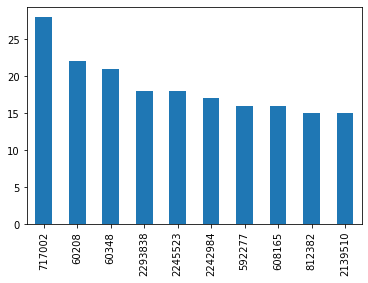

In [46]:
df.drug_identification_number.value_counts()[:10].plot(kind='bar')

In [47]:
df['Days2'] = df['Days'].dt.days
df['Days2']=df['Days2'].astype('int')
# df.to_csv("dattitos.csv", index=False)
df.shape

(13549, 24)

In [48]:
df= df[(df['Days2']>0)]
df.shape

(13332, 24)

In [49]:
print ("Unique values:  \n",df.nunique())


Unique values:  
 report_id                     13332
drug_identification_number     5391
report_type                       1
brand_name                     3395
company_name                    195
common_or_proper_name          4551
ingredients                    1169
strength(s)                     868
packaging_size                 2403
route_of_administration         178
shortage_status                   3
dosage_form(s)                  122
atc_code                        462
atc_description                 201
anticipated_start_date         1252
actual_start_date              1704
estimated_end_date             1597
actual_end_date                1670
reason                            7
date_created                   1516
date_updated                   1797
tier_3                            2
Days                            816
Days2                           816
dtype: int64


In [50]:
df2 = df[df.drug_identification_number==728187]

In [51]:
df2.shape

(11, 24)

array([[<AxesSubplot:title={'center':'Days2'}>]], dtype=object)

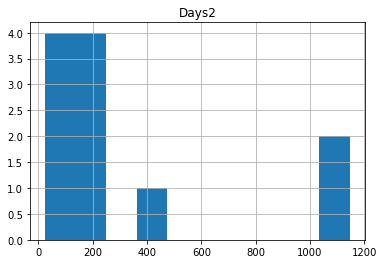

In [52]:
df2.hist(column='Days2')

<AxesSubplot:title={'center':'Days Distribution'}, ylabel='# of Days'>

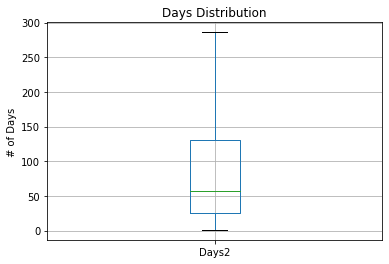

In [53]:
# Create a box plot to identify outliers

Boxplot, bp=plt.subplots()
# bp.set_xlabel('Days')
bp.set_ylabel('# of Days')
bp.set_title('Days Distribution')
bp.grid()
df.boxplot(column="Days2", showfliers=False)

In [54]:
df2.head()

,report_id,drug_identification_number,report_type,brand_name,company_name,common_or_proper_name,ingredients,strength(s),packaging_size,route_of_administration,...,anticipated_start_date,actual_start_date,estimated_end_date,actual_end_date,reason,date_created,date_updated,tier_3,Days,Days2
4808,183870,728187,Shortage,PMS-LORAZEPAM,PHARMASCIENCE INC,LORAZEPAM,LORAZEPAM,0.5MG,100,ORAL\r\nORAL,...,NaN,2023-02-07,2023-03-22,2023-03-20,Disruption of the manufacture of the drug.,2023-02-08,2023-03-21,No,41 days,41
13981,5489,728187,Shortage,PMS-LORAZEPAM TAB 0.5MG,PHARMASCIENCE INC,LORAZEPAM,LORAZEPAM,0.5MG,100,ORAL,...,NaN,2017-09-23,2018-03-20,2017-12-17,Disruption of the manufacture of the drug.,2017-04-04,2017-12-18,No,85 days,85
13982,5492,728187,Shortage,PMS-LORAZEPAM TAB 0.5MG,PHARMASCIENCE INC,LORAZEPAM,LORAZEPAM,0.5MG,1000,ORAL,...,NaN,2017-09-23,2017-12-18,2017-12-17,Disruption of the manufacture of the drug.,2017-04-04,2017-12-18,No,85 days,85
13983,5495,728187,Shortage,PMS-LORAZEPAM TAB 0.5MG,PHARMASCIENCE INC,LORAZEPAM,LORAZEPAM,0.5MG,500,ORAL,...,NaN,2017-03-23,2017-09-18,2017-09-18,Disruption of the manufacture of the drug.,2017-04-04,2017-12-18,No,179 days,179
13984,4234,728187,Shortage,PMS-LORAZEPAM TAB 0.5MG,PHARMASCIENCE INC,LORAZEPAM,LORAZEPAM,0.5MG,100,ORAL,...,NaN,2017-03-23,2017-09-18,2017-09-18,Disruption of the manufacture of the drug.,2017-03-24,2017-12-18,No,179 days,179


In [55]:
df2.dtypes

report_id                               int64
drug_identification_number              int32
report_type                            object
brand_name                             object
company_name                           object
common_or_proper_name                  object
ingredients                            object
strength(s)                            object
packaging_size                         object
route_of_administration                object
shortage_status                        object
dosage_form(s)                         object
atc_code                               object
atc_description                        object
anticipated_start_date                 object
actual_start_date              datetime64[ns]
estimated_end_date                     object
actual_end_date                datetime64[ns]
reason                                 object
date_created                           object
date_updated                           object
tier_3                            

In [56]:
col_list = ['actual_start_date', 'Days2']

In [57]:
df2 = df2[col_list]

In [58]:
df2.head()

,actual_start_date,Days2
4808,2023-02-07,41
13981,2017-09-23,85
13982,2017-09-23,85
13983,2017-03-23,179
13984,2017-03-23,179


In [59]:
df2.columns = ['ds', 'y']

In [60]:
df2.shape

(11, 2)

In [61]:
p = Prophet(interval_width=0.5, daily_seasonality=True)

In [62]:
model = p.fit(df2)

16:06:17 - cmdstanpy - INFO - Chain [1] start processing
16:06:18 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
future = p.make_future_dataframe(periods=365, freq='D')
future.tail()

,ds
365,2024-02-03
366,2024-02-04
367,2024-02-05
368,2024-02-06
369,2024-02-07


In [64]:
forecast_prediction = p.predict(future)
forecast_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-03-23,10.131133,49.954003,287.267062,10.131133,10.131133,168.861081,168.861081,168.861081,184.484914,184.484914,184.484914,-15.623833,-15.623833,-15.623833,0.0,0.0,0.0,178.992214
1,2017-04-20,10.075380,763.681433,1018.001274,10.075380,10.075380,880.777692,880.777692,880.777692,184.484914,184.484914,184.484914,696.292779,696.292779,696.292779,0.0,0.0,0.0,890.853072
2,2017-09-23,9.764572,-40.647534,212.856707,9.764572,9.764572,75.183254,75.183254,75.183254,184.484914,184.484914,184.484914,-109.301660,-109.301660,-109.301660,0.0,0.0,0.0,84.947826
3,2018-08-23,9.099570,-99.924605,144.451319,9.099570,9.099570,16.838529,16.838529,16.838529,184.484914,184.484914,184.484914,-167.646385,-167.646385,-167.646385,0.0,0.0,0.0,25.938098
4,2023-02-07,5.856191,-88.043976,163.583506,5.856191,5.856191,35.184406,35.184406,35.184406,184.484914,184.484914,184.484914,-149.300508,-149.300508,-149.300508,0.0,0.0,0.0,41.040596


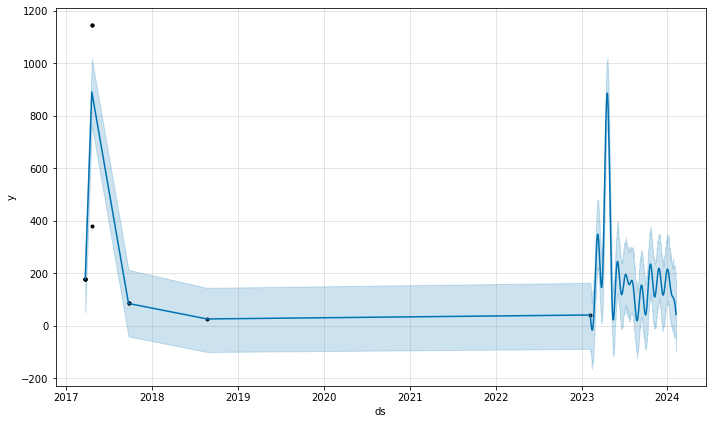

In [65]:
plot1 = p.plot(forecast_prediction)

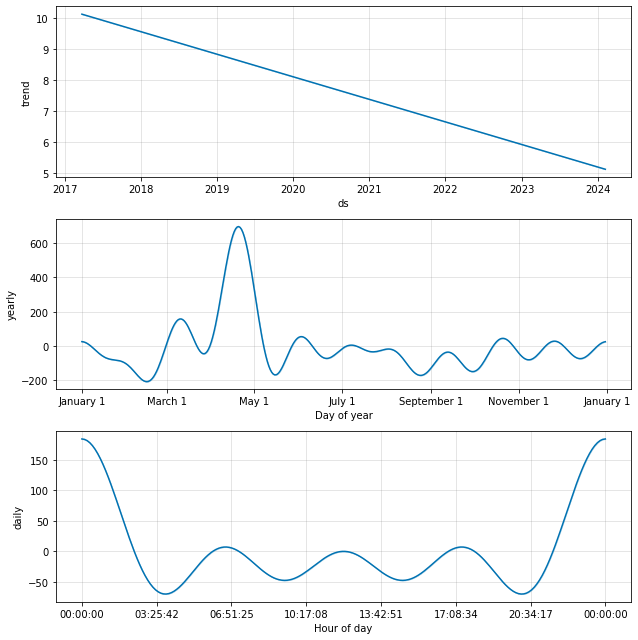

In [66]:
plot2 = p.plot_components(forecast_prediction)

(19358.0, 19814.0)

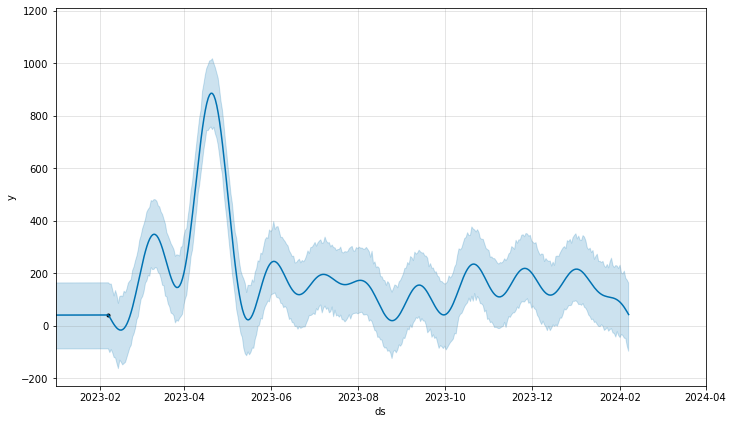

In [69]:
fig = p.plot(forecast_prediction)
ax = fig.gca()
# setting x limit. date range to plot
ax.set_xlim(pd.to_datetime(['2023-01-01', '2024-04-01'])) 
# ax.set_ylim([0, 700]) 